# RDD


In [92]:
from pyspark import SparkContext

In [93]:
sc = SparkContext(master='local', appName='RDD')

## Creando mi primer RDD

In [94]:
rdd1 = sc.parallelize([1,2,3])
type(rdd1)

pyspark.rdd.RDD

se usar ``collect()`` para mostrar todo el RDD seleccionado 

In [95]:
rdd1.collect()

[1, 2, 3]

In [96]:
sc

<SparkContext master=local appName=transformacionesYAcciones>

## Leyendo desde un archivo

In [97]:
equiposOlimpicosRDD = (
    sc.textFile('files/paises.csv')
    .map(lambda line: line.split(','))
    )

equiposOlimpicosRDD.take(5)

[['id', 'equipo', 'sigla'],
 ['1', '30. Februar', 'AUT'],
 ['2', 'A North American Team', 'MEX'],
 ['3', 'Acipactli', 'MEX'],
 ['4', 'Acturus', 'ARG']]

### ¿Cuántos países están juando en los olímpicos?


In [98]:
equiposOlimpicosRDD.map(lambda fila: fila[2]).distinct().count()

231

### ¿Cuántos equipos distintos tiene cada país?

Todo se guarda en formato de *llave valor*, por eso primero debo obtener las siglas del país y luego el nombre del equipo, para que al usar *groupByKey* tome las siglas como *Keys*.

`map()` opera sobre toda la tupla (llave-valor), `mapValues()` opera solo sobre el valor.

In [99]:
equiposOlimpicosRDD \
    .map(lambda fila: (fila[2], fila[1])) \
    .groupByKey() \
    .mapValues(len) \
    .take(5)

[('sigla', 1), ('AUT', 11), ('MEX', 9), ('ARG', 18), ('AFG', 1)]

Aquí ya puedo ver claramente ese formato *clave-valor*

In [100]:
equiposOlimpicosRDD \
    .map(lambda fila: (fila[2], fila[1])) \
    .groupByKey() \
    .mapValues(list). \
    take(5)

[('sigla', ['equipo']),
 ('AUT',
  ['30. Februar',
   'Austria',
   'Austria-1',
   'Austria-2',
   'Breslau',
   'Brigantia',
   'Donar III',
   'Evita VI',
   'May-Be 1960',
   '"R.-V. Germania; Leitmeritz"',
   'Surprise']),
 ('MEX',
  ['A North American Team',
   'Acipactli',
   'Chamukina',
   'Mexico',
   'Mexico-1',
   'Mexico-2',
   'Nausikaa 4',
   'Tlaloc',
   'Xolotl']),
 ('ARG',
  ['Acturus',
   'Antares',
   'Arcturus',
   'Ardilla',
   'Argentina',
   'Argentina-1',
   'Argentina-2',
   'Blue Red',
   'Covunco III',
   'Cupidon III',
   'Djinn',
   'Gullvinge',
   'Matrero II',
   'Mizar',
   'Pampero',
   'Rampage',
   'Tango',
   'Wiking']),
 ('AFG', ['Afghanistan'])]

### Filtrar por país específico

In [101]:
equiposArgentinos = equiposOlimpicosRDD.filter(lambda fila: 'ARG' in fila)
equiposArgentinos.collect()

[['4', 'Acturus', 'ARG'],
 ['37', 'Antares', 'ARG'],
 ['42', 'Arcturus', 'ARG'],
 ['43', 'Ardilla', 'ARG'],
 ['45', 'Argentina', 'ARG'],
 ['46', 'Argentina-1', 'ARG'],
 ['47', 'Argentina-2', 'ARG'],
 ['119', 'Blue Red', 'ARG'],
 ['238', 'Covunco III', 'ARG'],
 ['252', 'Cupidon III', 'ARG'],
 ['288', 'Djinn', 'ARG'],
 ['436', 'Gullvinge', 'ARG'],
 ['644', 'Matrero II', 'ARG'],
 ['672', 'Mizar', 'ARG'],
 ['774', 'Pampero', 'ARG'],
 ['843', 'Rampage', 'ARG'],
 ['1031', 'Tango', 'ARG'],
 ['1162', 'Wiking', 'ARG']]

In [102]:
print(type(equiposArgentinos))
print(type(equiposOlimpicosRDD))

<class 'pyspark.rdd.PipelinedRDD'>
<class 'pyspark.rdd.PipelinedRDD'>


### Conteo aproximado 

Contar sin morir en el intento

Si uso `count()` el programa puede tardar mucho para contar si el set de datos es muy grande. Al usar `countAppronx(ms)` cuenta durante los segundo que se le indique.

In [103]:
equiposOlimpicosRDD.countApprox(1)

1185

In [104]:
!ls files/

deporte.csv	 deportistaError.csv  modelo_relacional.jpg
deportista.csv	 evento.csv	      paises.csv
deportista2.csv  juegos.csv	      resultados.csv


## Operaciones entre conjuntos de datos

![](https://raw.githubusercontent.com/terranigmark/curso-apache-spark-platzi/master/files/modelo_relacional.jpg)

Deportistas olimpicos. El set esta dividido en dos archivos.

In [105]:
deportistaOlimpicoRDD = sc.textFile('files/deportista.csv').map(lambda l: l.split(','))
deportistaOlimpicoRDD2 = sc.textFile('files/deportista2.csv').map(lambda l: l.split(','))

deportistaOlimpicoRDD = deportistaOlimpicoRDD.union(deportistaOlimpicoRDD2)

deportistaOlimpicoRDD.count()

135572

In [106]:
equiposOlimpicosRDD.take(5)

[['id', 'equipo', 'sigla'],
 ['1', '30. Februar', 'AUT'],
 ['2', 'A North American Team', 'MEX'],
 ['3', 'Acipactli', 'MEX'],
 ['4', 'Acturus', 'ARG']]

In [107]:
deportistaOlimpicoRDD.take(5)

[['deportista_id', 'nombre', 'genero', 'edad', 'altura', 'peso', 'equipo_id'],
 ['1', 'A Dijiang', '1', '24', '180', '80', '199'],
 ['2', 'A Lamusi', '1', '23', '170', '60', '199'],
 ['3', 'Gunnar Nielsen Aaby', '1', '24', '0', '0', '273'],
 ['4', 'Edgar Lindenau Aabye', '1', '34', '0', '0', '278']]

Para hacer un Join debo organizar el set de datos con el `id` como *key* y el resto de datos como *value*.

Estoy buscando el país al que corresponde cada jugador.

In [108]:
deportistaOlimpicoRDD.map(lambda l: [l[-1],l[:-1]] ).take(5)

[['equipo_id',
  ['deportista_id', 'nombre', 'genero', 'edad', 'altura', 'peso']],
 ['199', ['1', 'A Dijiang', '1', '24', '180', '80']],
 ['199', ['2', 'A Lamusi', '1', '23', '170', '60']],
 ['273', ['3', 'Gunnar Nielsen Aaby', '1', '24', '0', '0']],
 ['278', ['4', 'Edgar Lindenau Aabye', '1', '34', '0', '0']]]

In [109]:
deportistaOlimpicoRDD \
    .map(lambda l: [l[-1],l[:-1]] ) \
    .join(equiposOlimpicosRDD.map(lambda l: [l[0],l[2]])) \
    .take(6)

[('199', (['1', 'A Dijiang', '1', '24', '180', '80'], 'CHN')),
 ('199', (['2', 'A Lamusi', '1', '23', '170', '60'], 'CHN')),
 ('199', (['602', 'Abudoureheman', '1', '22', '182', '75'], 'CHN')),
 ('199', (['1463', 'Ai Linuer', '1', '25', '160', '62'], 'CHN')),
 ('199', (['1464', 'Ai Yanhan', '2', '14', '168', '54'], 'CHN')),
 ('199', (['3605', 'An Weijiang', '1', '22', '178', '72'], 'CHN'))]

Resultados de la medallería.

In [110]:
resultadoRDD = sc.textFile('files/resultados.csv').map(lambda l: l.split(','))
print(resultadoRDD.take(1))
resultadoRDD.takeSample(False, 10)


[['resultado_id', 'medalla', 'deportista_id', 'juego_id', 'evento_id']]


[['7597', 'NA', '4233', '51', '15'],
 ['263342', 'NA', '131785', '42', '270'],
 ['215377', 'NA', '108130', '23', '106'],
 ['42442', 'NA', '21894', '50', '34'],
 ['258630', 'NA', '129497', '17', '24'],
 ['90009', 'NA', '45611', '37', '68'],
 ['180577', 'NA', '90752', '47', '213'],
 ['83261', 'NA', '42302', '24', '33'],
 ['262910', 'NA', '131553', '43', '277'],
 ['177959', 'NA', '89416', '5', '537']]

Solo deportistas que han obtenido una medalla.

In [111]:
ganadores = resultadoRDD.filter(lambda l: 'NA' not in l[1])
print(ganadores.take(1))
ganadores.takeSample(False, 10)

[['resultado_id', 'medalla', 'deportista_id', 'juego_id', 'evento_id']]


[['33010', 'Bronze', '16986', '21', '402'],
 ['47729', 'Bronze', '24609', '51', '55'],
 ['86451', 'Silver', '43834', '49', '245'],
 ['144926', 'Gold', '72731', '47', '281'],
 ['57851', 'Bronze', '29627', '49', '87'],
 ['66764', 'Bronze', '34151', '27', '119'],
 ['1756', 'Gold', '974', '6', '298'],
 ['219438', 'Silver', '110228', '29', '106'],
 ['255297', 'Silver', '127806', '29', '204'],
 ['237155', 'Bronze', '118933', '49', '46']]

Estoy buscando la medalla que ha ganado cada jugador unido al país al que pertenece.

In [112]:
deportista_pais_medalla = (deportistaOlimpicoRDD
    .map(lambda l: [l[-1],l[:-1]])
    .join(equiposOlimpicosRDD.map(lambda l: [l[0],l[2]]))
    .map(lambda l: (l[1][0][0], (l[0], l[1][0][1:], l[1][1]) ))
    # la key es deportista id
    # el value es equipo_id, datos del jugador, pais
    .join(ganadores.map(lambda l: [l[2],[l[1]]]) )
    )
deportista_pais_medalla.take(5)

[('7597',
  (('199', ['Bao Yingying', '2', '24', '172', '67'], 'CHN'), ['Silver'])),
 ('17282',
  (('199', ['Cai Huijue', '2', '16', '174', '63'], 'CHN'), ['Bronze'])),
 ('17996',
  (('199', ['Cao Mianying', '2', '21', '176', '71'], 'CHN'), ['Silver'])),
 ('19779', (('199', ['Chang Si', '2', '25', '170', '56'], 'CHN'), ['Silver'])),
 ('19791',
  (('199', ['Chang Yongxiang', '1', '24', '178', '74'], 'CHN'), ['Silver']))]

Revisando si salen los jugadores que han ganado más de una medalla

In [113]:
deportista_pais_medalla.filter(lambda l: l[0] == '17').take(5)

[('17',
  (('350', ['Paavo Johannes Aaltonen', '1', '28', '175', '64'], 'FIN'),
   ['Bronze'])),
 ('17',
  (('350', ['Paavo Johannes Aaltonen', '1', '28', '175', '64'], 'FIN'),
   ['Gold'])),
 ('17',
  (('350', ['Paavo Johannes Aaltonen', '1', '28', '175', '64'], 'FIN'),
   ['Gold'])),
 ('17',
  (('350', ['Paavo Johannes Aaltonen', '1', '28', '175', '64'], 'FIN'),
   ['Gold'])),
 ('17',
  (('350', ['Paavo Johannes Aaltonen', '1', '28', '175', '64'], 'FIN'),
   ['Bronze']))]

### Obteniendo puntajes de los olimpicos por país

In [117]:
valoresMedallas = {'Gold':7, 'Silver':5, 'Bronze':4}
valoresMedallas['Gold']

7

In [123]:
paises_medallas = (deportista_pais_medalla
    .map(lambda l: [ l[1][0][-1], valoresMedallas[l[1][1][0]] ])
    )
paises_medallas.take(5)

[['CHN', 5], ['CHN', 4], ['CHN', 5], ['CHN', 5], ['CHN', 5]]

In [127]:
from operator import add
conclusion = (paises_medallas
    .reduceByKey((add))
    .sortBy(lambda l: l[1], ascending=False)
    )
conclusion.collect()

[('USA', 32137),
 ('URS', 14834),
 ('GBR', 10925),
 ('GER', 10896),
 ('FRA', 9265),
 ('ITA', 8755),
 ('SWE', 8110),
 ('CAN', 7209),
 ('AUS', 6755),
 ('HUN', 6142),
 ('GDR', 5992),
 ('NOR', 5627),
 ('CHN', 5362),
 ('NED', 5351),
 ('RUS', 5298),
 ('JPN', 4702),
 ('FIN', 4464),
 ('SUI', 3530),
 ('KOR', 3472),
 ('ROU', 3317),
 ('FRG', 3174),
 ('DEN', 3156),
 ('POL', 2802),
 ('TCH', 2575),
 ('ESP', 2517),
 ('BRA', 2402),
 ('BEL', 2372),
 ('AUT', 2292),
 ('CUB', 2262),
 ('YUG', 2256),
 ('EUN', 1902),
 ('BUL', 1678),
 ('ARG', 1465),
 ('GRE', 1287),
 ('NZL', 1233),
 ('IND', 1231),
 ('UKR', 999),
 ('JAM', 847),
 ('CRO', 730),
 ('RSA', 685),
 ('PAK', 645),
 ('CZE', 594),
 ('BLR', 575),
 ('KEN', 567),
 ('MEX', 564),
 ('TUR', 526),
 ('NGR', 505),
 ('SCG', 373),
 ('SRB', 359),
 ('IRI', 347),
 ('URU', 347),
 ('KAZ', 336),
 ('PRK', 332),
 ('ETH', 287),
 ('IRL', 247),
 ('SVK', 247),
 ('EST', 240),
 ('LTU', 230),
 ('TPE', 224),
 ('INA', 219),
 ('AZE', 206),
 ('SLO', 202),
 ('BAH', 198),
 ('ANZ', 193),


In [133]:
import matplotlib.pyplot as plt


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

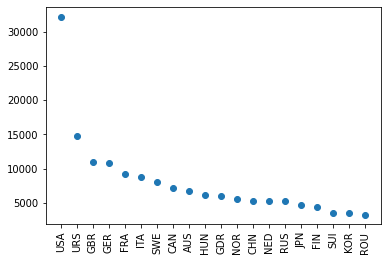

In [136]:
plt.scatter(conclusion.map(lambda x: x[0]).take(20) , conclusion.map(lambda x: x[1]).take(20))
plt.xticks(rotation=90)

Funciones de acción usadas hasta ahora

`top(n)`

`take(n)`

`takeSample(bool, n)`

In [91]:
sc.stop()